<a href="https://colab.research.google.com/github/OraWetzler/ACA_final_project_KWS/blob/main/Architectures_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install neccessary libraries

In [ ]:
!pip install tensorflow
!pip install tensorflow_datasets
!pip install datasets
!pip install librosa
!pip install tensorflow_io
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
   

import the dataset

In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from torchaudio.datasets import SPEECHCOMMANDS
from IPython.display import Audio
import tqdm.notebook as tqdm
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow as tf
# import tensorflow_io as tfio

version = 3 # just 3 is available
ds = tfds.load(f'speech_commands:0.0.{version}')
train = ds['train']
validation = ds['validation']
test = ds['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.A90LDQ_0.0.3/speech_commands-train.tfrecord*...…

Generating validation examples...:   0%|          | 0/10102 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.A90LDQ_0.0.3/speech_commands-validation.tfrecor…

Generating test examples...:   0%|          | 0/4890 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.A90LDQ_0.0.3/speech_commands-test.tfrecord*...:…

Dataset speech_commands downloaded and prepared to /root/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.


Show some example from the dataset

In [ ]:
for example in ds['train'].take(1):
  raw_audio = example['audio']
  numbered_label = example['label']
  #str_label = example['file']
  print("raw_audio: ", raw_audio)
  print("numbered_label: ", numbered_label)
  #print("str_label: ", str_label)

raw_audio:  tf.Tensor([-15 -18 -12 ...  16  21  25], shape=(16000,), dtype=int16)
numbered_label:  tf.Tensor(4, shape=(), dtype=int64)


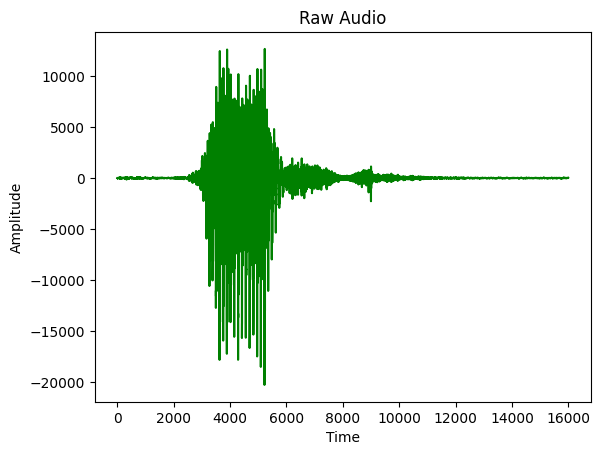

In [ ]:
import matplotlib.pyplot as plt
plt.plot(raw_audio.numpy(), color = 'green')
plt.title("Raw Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
# display the
import IPython.display as ipd
ipd.Audio(raw_audio.numpy(), rate = 16000)